   #                       **MScFE-610 GWP-1**

## *GROUP 5-R*

### Contributors:  
                        - Gaurav Sharma   [sharma279gaurav@gmail.com]
                        - Dhruv Gupta     [rickygupta8447091203@gmail.com]

#### QUESTION - 1    IMPORTING THE DATA

1. Closing daily interest rates of the 6 active benchmarks (2,3,5,7,10,30 yrs) of US Treasury yields have been taken from https://home.treasury.gov/ 
2. Gold ETF [IAU]  have been taken from https://finance.yahoo.com/ 
3. Equity ETF [NIFTYBEES.NS] have been taken from https://finance.yahoo.com/

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

In [203]:
df2 = pd.read_csv('/Users/gaush/Downloads/DGS2.csv')
df3 = pd.read_csv('/Users/gaush/Downloads/DGS3.csv')
df5 = pd.read_csv('/Users/gaush/Downloads/DGS5.csv')
df7 = pd.read_csv('/Users/gaush/Downloads/DGS7.csv')
df10 = pd.read_csv('/Users/gaush/Downloads/DGS10.csv')
df30 = pd.read_csv('/Users/gaush/Downloads/DGS30.csv')
g_etf = pd.read_csv('/Users/gaush/Downloads/IAU.csv')
e_etf = pd.read_csv('/Users/gaush/Downloads/NIFTYBEES.NS.csv')

In [204]:
e_etf.drop([ 'Open', 'High', 'Low', 'Close', 'Volume'],axis=1,inplace=True)
g_etf.drop([ 'Open', 'High', 'Low', 'Close', 'Volume'],axis=1,inplace=True)
g_etf.rename(columns={'Date':'DATE','Adj Close':'getf_$'}, inplace=True)
e_etf.rename(columns={'Date':'DATE','Adj Close':'eetf_INR'}, inplace=True)
g_etf.fillna(method='ffill',inplace=True)
e_etf.fillna(method='ffill',inplace=True)
dfs = [df2,df3,df5,df7,df10,df30]
df_final = reduce(lambda left,right: pd.merge(left,right,on='DATE'), dfs)
df_final = df_final[(df_final["DATE"] > '2019-10-01') & (df_final["DATE"] < '2019-11-30')].reset_index(drop=True)
g_etf = g_etf[(g_etf["DATE"] > '2019-10-01') & (g_etf["DATE"] < '2019-11-30')].reset_index(drop=True)
e_etf = e_etf[(e_etf["DATE"] > '2019-10-01') & (e_etf["DATE"] < '2019-11-30')].reset_index(drop=True)
x = pd.merge(e_etf,df_final,on='DATE',how='left')
x = pd.merge(g_etf,x,on='DATE',how='left')
x = x.dropna().reset_index(drop=True)
df = x[x.DGS2 != '.'].reset_index(drop=True)
t = df["DATE"]
df.drop('DATE',axis=1,inplace=True)
df =df.astype(float)
df["DATE"] = t

In [205]:
print(df.dtypes)
df.head()

getf_$      float64
eetf_INR    float64
DGS2        float64
DGS3        float64
DGS5        float64
DGS7        float64
DGS10       float64
DGS30       float64
DATE         object
dtype: object


,getf_$,eetf_INR,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30,DATE
0,14.41,119.844002,1.39,1.34,1.34,1.45,1.54,2.04,2019-10-03
1,14.41,118.214996,1.40,1.35,1.34,1.43,1.52,2.01,2019-10-04
2,14.28,117.569000,1.46,1.41,1.38,1.47,1.56,2.05,2019-10-07
3,14.42,119.427002,1.47,1.43,1.40,1.50,1.59,2.08,2019-10-09
4,14.29,118.539001,1.53,1.49,1.48,1.57,1.67,2.16,2019-10-10


### QUESTION-2 DATA PROCESSING

In [206]:
x = df.shift(1,axis=0)
df["getf_Returns"] = np.log(df["getf_$"]/x["getf_$"])
df["eetf_Returns"] = np.log(df["eetf_INR"]/x["eetf_INR"])
df = df.fillna(0)
df.head()

,getf_$,eetf_INR,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30,DATE,getf_Returns,eetf_Returns
0,14.41,119.844002,1.39,1.34,1.34,1.45,1.54,2.04,2019-10-03,0.000000,0.000000
1,14.41,118.214996,1.40,1.35,1.34,1.43,1.52,2.01,2019-10-04,0.000000,-0.013686
2,14.28,117.569000,1.46,1.41,1.38,1.47,1.56,2.05,2019-10-07,-0.009062,-0.005480
3,14.42,119.427002,1.47,1.43,1.40,1.50,1.59,2.08,2019-10-09,0.009756,0.015680
4,14.29,118.539001,1.53,1.49,1.48,1.57,1.67,2.16,2019-10-10,-0.009056,-0.007463


### QUESTION-3 DATA SUMMARY

In [207]:
f = lambda x: 1 if(x['DATE'].split('-')[1] == '10') else 0
df["IfOct"] = df.apply(f, axis=1)

In [208]:
# THIS IS FOR THE MONTH OF OCTOBER ax = plt.gca()
df[df["IfOct"]==1].describe()

,getf_$,eetf_INR,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30,getf_Returns,eetf_Returns,IfOct
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,14.308235,121.630118,1.553529,1.532941,1.528235,1.618235,1.712353,2.195882,0.000204,0.002712,1.0
std,0.086403,2.469807,0.079210,0.094985,0.102178,0.097483,0.099532,0.095332,0.006556,0.008504,0.0
min,14.180000,117.569000,1.390000,1.340000,1.340000,1.430000,1.520000,2.010000,-0.012579,-0.013686,1.0
25%,14.250000,119.736000,1.520000,1.490000,1.480000,1.570000,1.670000,2.160000,-0.002113,-0.002646,1.0
50%,14.280000,122.480003,1.580000,1.570000,1.570000,1.660000,1.760000,2.230000,0.000000,0.000612,1.0
75%,14.400000,122.995003,1.610000,1.600000,1.590000,1.680000,1.770000,2.260000,0.004924,0.009451,1.0
max,14.460000,125.498001,1.640000,1.650000,1.660000,1.740000,1.840000,2.330000,0.009756,0.017330,1.0


In [209]:
# THIS IS FOR THE MONTH OF NOVEMBER
df[df["IfOct"]==0].describe()

,getf_$,eetf_INR,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30,getf_Returns,eetf_Returns,IfOct
count,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,14.078333,126.556333,1.61000,1.607778,1.634444,1.730000,1.806111,2.274444,-0.001875,0.000885,0.0
std,0.159825,0.717273,0.03272,0.040953,0.049375,0.057189,0.061275,0.074298,0.006540,0.004208,0.0
min,13.910000,125.545998,1.56000,1.550000,1.550000,1.630000,1.730000,2.180000,-0.016772,-0.007248,0.0
25%,13.980000,126.059748,1.60000,1.590000,1.620000,1.710000,1.770000,2.210000,-0.005020,-0.002146,0.0
50%,14.030000,126.419003,1.61000,1.600000,1.630000,1.720000,1.790000,2.265000,-0.000715,0.000203,0.0
75%,14.080000,126.942497,1.62500,1.610000,1.645000,1.745000,1.835000,2.310000,0.003573,0.003832,0.0
max,14.460000,127.902000,1.68000,1.700000,1.740000,1.860000,1.940000,2.430000,0.005020,0.010190,0.0


### QUESTION-4 GRAPHING

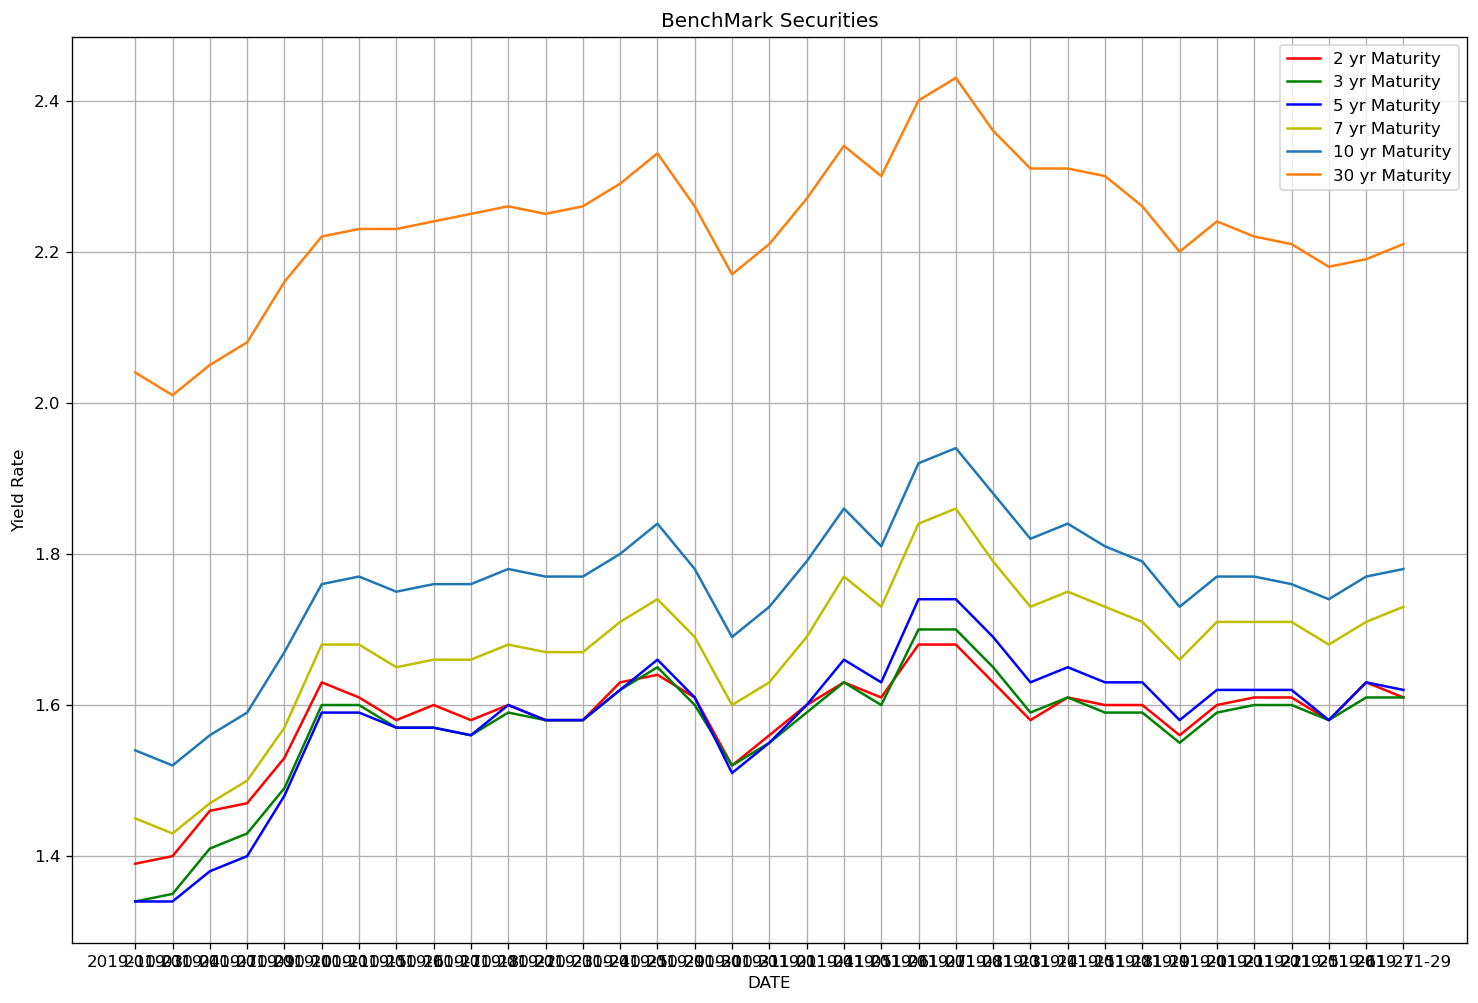

In [210]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(df['DATE'],df['DGS2'],color='red',label="2 yr Maturity")
ax.plot(df['DATE'],df['DGS3'],color='g',label="3 yr Maturity")
ax.plot(df['DATE'],df['DGS5'],color='b',label="5 yr Maturity")
ax.plot(df['DATE'],df['DGS7'],color='y',label="7 yr Maturity")
ax.plot(df['DATE'],df['DGS10'],label="10 yr Maturity")
ax.plot(df['DATE'],df['DGS30'],label="30 yr Maturity")
plt.grid()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.legend()
plt.title('BenchMark Securities')
plt.xlabel("DATE")
plt.ylabel('Yield Rate')
plt.show()

Text(0.5, 1.0, 'ETF DATA')

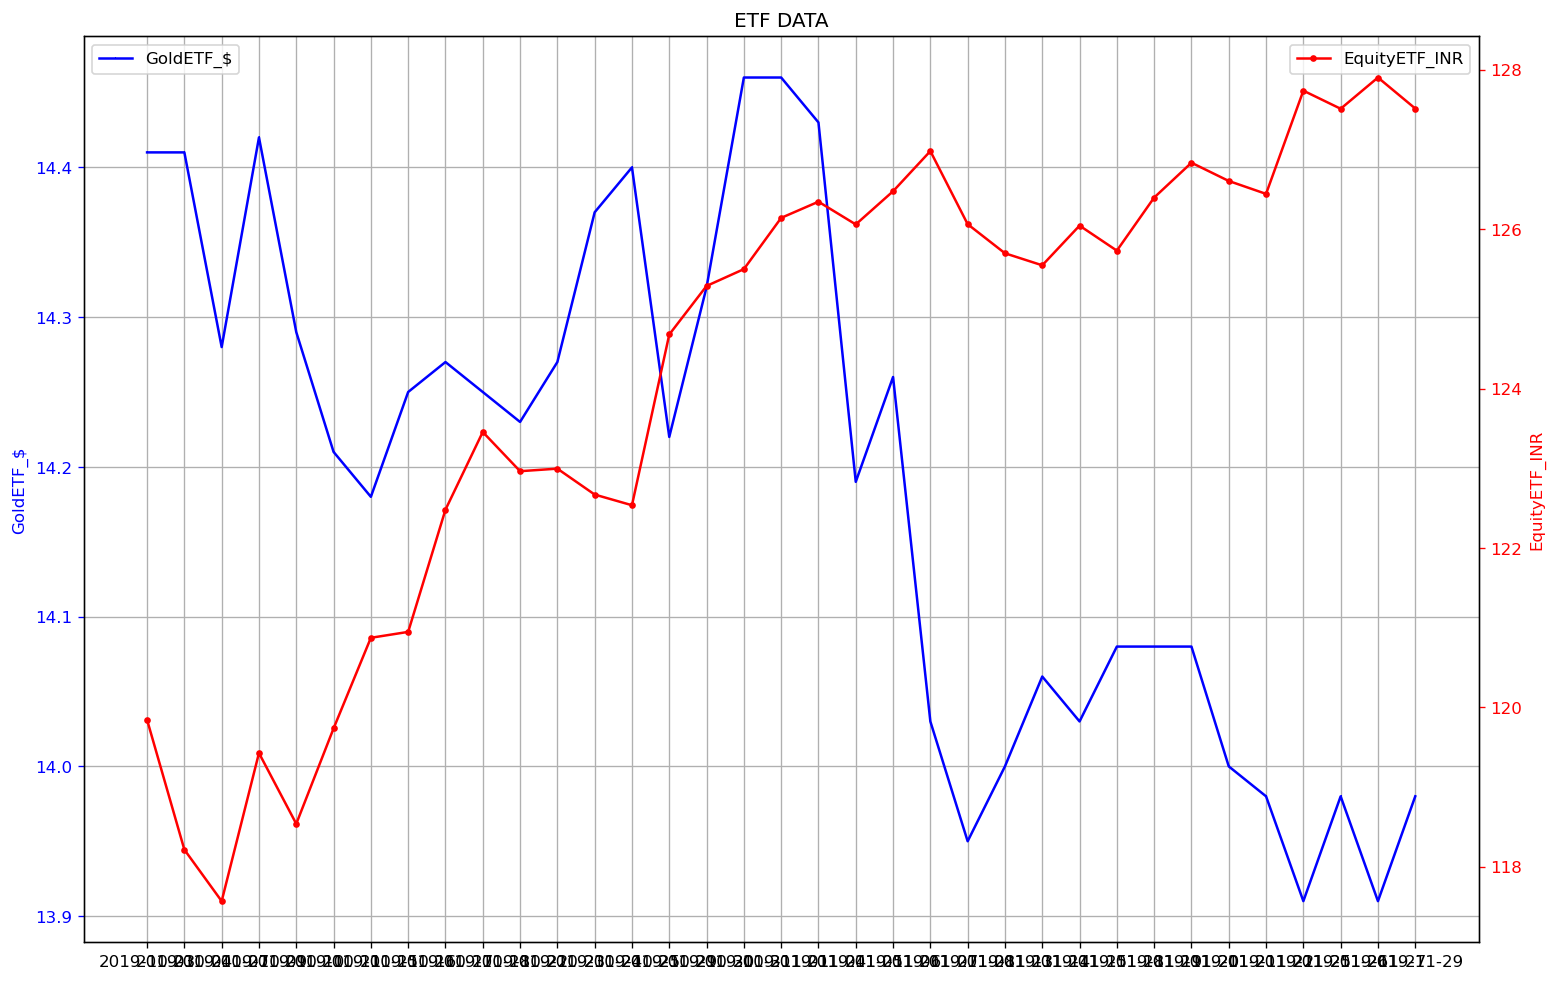

In [211]:
fig, ax = plt.subplots(figsize=(15,10))


ax.plot(df["DATE"],df["getf_$"],label="GoldETF",marker=',', color='b')
myLeg =  "GoldETF_$"
ax.set_ylabel(myLeg, color='b')
ax.tick_params('y', colors='b')
ax.legend([myLeg],loc=2)
ax2 = ax.twinx()
ax2.plot(df["DATE"],df["eetf_INR"],label="EquityETF",marker='.', color='r')
myLeg1 =  "EquityETF_INR"
ax2.set_ylabel(myLeg1, color='r')
ax2.tick_params('y', colors='r')
ax2.legend([myLeg1])
ax.grid()
plt.xlabel("DATE")
plt.title('ETF DATA')

### QUESTION-5 FITTING THE YEIDL CURVE

Nelson–Siegel–Svensson (NSS) model 

$y(m) = \beta_{0} + \beta_{1}\frac{(1 - e^{-m/\tau})}{(m/\tau)} + \beta_{2}(\frac{(1 - e^{-m/\tau})}{(m/\tau)} - e^{-m/\tau}) $

- y(m) is the yield we are trying to model
- m is the maturity
- $\tau$ is the decay factor
- $\beta$ are short,medium and long term components fitted via least square method

In [212]:
x= [2,3,5,7,10,30]
a = np.linspace(1,30,30)
for i in range(df.shape[0]):
    y = [df.iloc[i,2],df.iloc[i,3],df.iloc[i,4],df.iloc[i,5],df.iloc[i,6],df.iloc[i,7]]
    
    yinterp = np.interp(a,x,y)
    
    curve, status = calibrate_ns_ols(a, yinterp, tau0=1.0)  # starting value of 1.0 for the optimization of tau
    assert status.success
    df.loc[i,"beta0"]= curve.beta0
    df.loc[i,"beta1"]= curve.beta1
    df.loc[i,"beta2"]= curve.beta2
    df.loc[i,"tau"] = curve.tau

df.head()

,getf_$,eetf_INR,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30,DATE,getf_Returns,eetf_Returns,IfOct,beta0,beta1,beta2,tau
0,14.41,119.844002,1.39,1.34,1.34,1.45,1.54,2.04,2019-10-03,0.000000,0.000000,1,2.631810,-1.242670,-1.582734,6.817717
1,14.41,118.214996,1.40,1.35,1.34,1.43,1.52,2.01,2019-10-04,0.000000,-0.013686,1,2.592585,-1.177596,-1.644056,6.700367
2,14.28,117.569000,1.46,1.41,1.38,1.47,1.56,2.05,2019-10-07,-0.009062,-0.005480,1,2.612625,-1.122368,-1.715183,6.415888
3,14.42,119.427002,1.47,1.43,1.40,1.50,1.59,2.08,2019-10-09,0.009756,0.015680,1,2.650283,-1.160183,-1.655287,6.566354
4,14.29,118.539001,1.53,1.49,1.48,1.57,1.67,2.16,2019-10-10,-0.009056,-0.007463,1,2.730325,-1.188913,-1.601912,6.631630


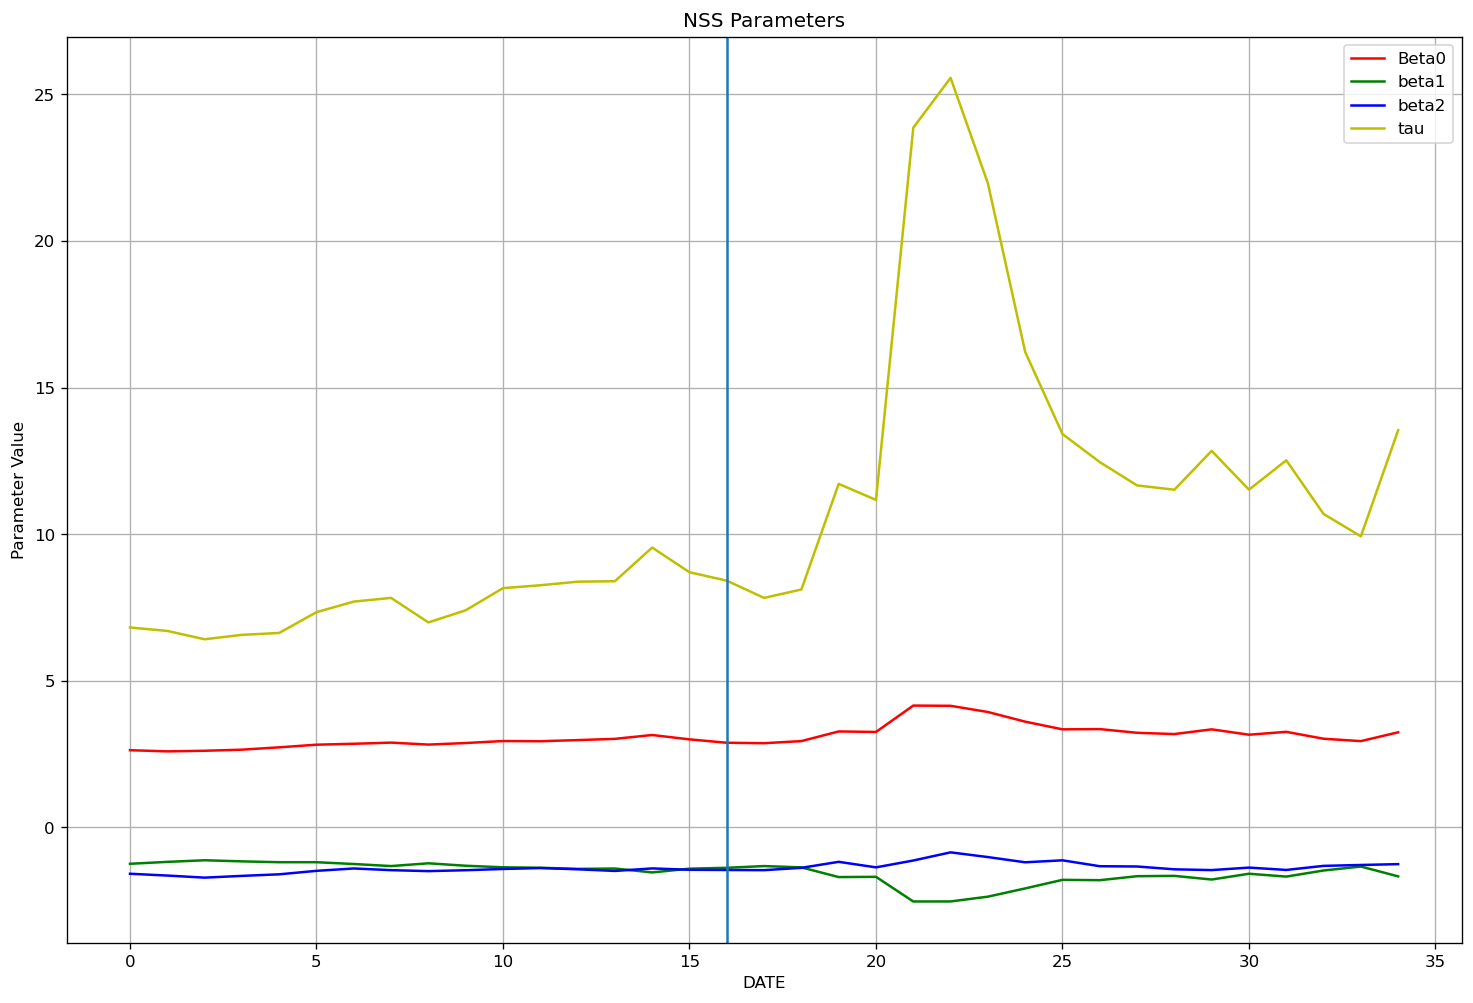

In [213]:
# Plotting the parameters of NSS
# Vertical line refers to Start of November

fig,ax = plt.subplots(figsize=(15,10))
ax.plot(df['beta0'],color='red',label="Beta0")
ax.plot(df['beta1'],color='g',label="beta1")
ax.plot(df['beta2'],color='b',label="beta2")
ax.plot(df['tau'],color='y',label="tau")
plt.grid()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.legend()
ax.axvline(16)
plt.title('NSS Parameters')
plt.xlabel("DATE")
plt.ylabel('Parameter Value')
plt.show()

Here we can see that, values of the parameters were stable before the change. But we can see some kind of turbulance in the values, in the month of November. However, the values tend to be stable again; at the end of the November.

### QUESTION-6 MODELING THE PRICES

In [214]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
import pmdarima as pmd

In [215]:
x = df[df["IfOct"]==1]["eetf_INR"]
result = adfuller(x.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.606330
p-value: 0.091696


Here we can see that for EquityETF October, the series doesnt pass the ADF test; p > 0.05 ; We cant reject the null hypothesis

In [216]:
## Adf Test
print(ndiffs(x, test='adf'))  

# KPSS test
print(ndiffs(x, test='kpss'))

# PP test:
print(ndiffs(x, test='pp')) 

2
1
2


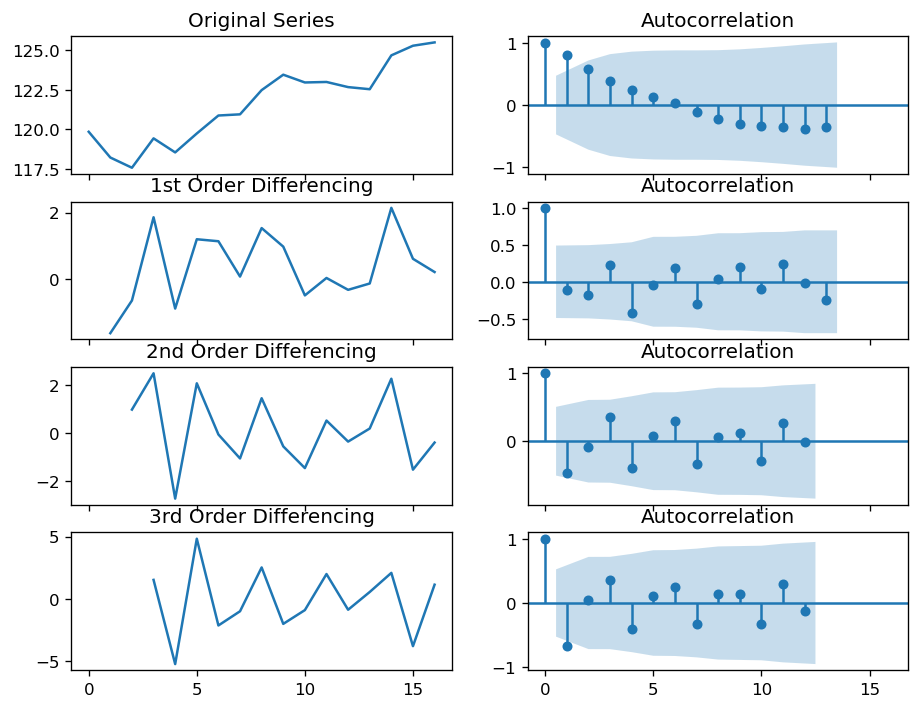

In [217]:

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(x); axes[0, 0].set_title('Original Series')
plot_acf(x, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(x.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(x.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(x.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(x.diff().diff().dropna(), ax=axes[2, 1])

axes[3, 0].plot(x.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(x.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

Here we can see that after the first differenceing, the first lag is significant and the rest are not.
However, in the autocorrelation of original series; first 2 lags are very significant.
We can go with d=2

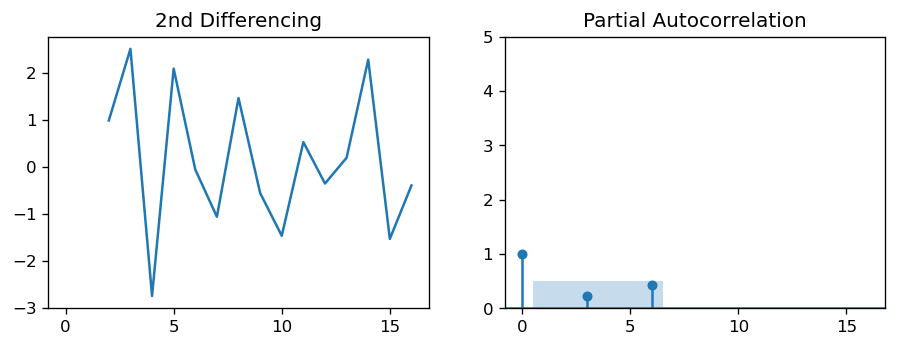

In [218]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(x.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(x.diff().diff().dropna(), ax=axes[1],lags=6)

plt.show()

Here we have plot the PACF for first 6 legs and we can see the only first lag is significant;
thus we can take value of p=1

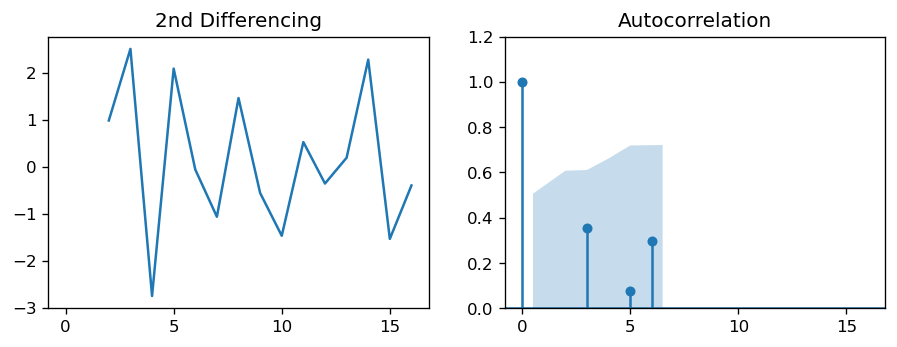

In [219]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(x.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(x.diff().diff().dropna(), ax=axes[1],lags=6)

plt.show()

here first lag is significant; going with q = 1

In [220]:
import pmdarima as pmd


autoarima_model = pmd.auto_arima(x, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=56.385, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=54.890, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=50.935, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=51.075, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=50.266, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=52.130, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=51.786, Time=0.03 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 0.600 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   17
Model:               SARIMAX(2, 2, 1)   Log Likelihood                 -21.133
Date:                Wed, 06 Jan 2021   AIC                             50.266
Time:                        21:56:32   BIC                             53.098
Sample:                             0   HQIC                            50.235
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1971      0.203     -5.888      0.000      -1.596      -0.799
ar.L2         -0.8703      0.134     -6.482      0.000      -1.133      -0.607
ma.L1          0.6291      0.289      2.180      0.029       0.064       1.195
sigma2         0.8125      0.492      1.651      0.099      -0.152       1.777
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.57   Prob(JB):                         0.81
Heteroskedasticity (H):               0.95   Skew:                             0.31
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Here we got the ARIMA MOdel (2,2,1) as the best fit. Note the p values of the 2 AR terms as well as 1 MA term.
All are < 0.05 ; which is a good fit for us. 

In [221]:
model = ARIMA(x, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.eetf_INR   No. Observations:                   15
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -21.199
Method:                       css-mle   S.D. of innovations              0.836
Date:                Wed, 06 Jan 2021   AIC                             52.397
Time:                        21:56:32   BIC                             55.938
Sample:                             2   HQIC                            52.360
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0761      0.140      0.542      0.588      -0.199       0.351
ar.L1.D2.eetf_INR    -1.3023      0.123    -10.607      0.000      -1.543      -1.062
ar.L2.D2.eetf_INR    -0.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'ava

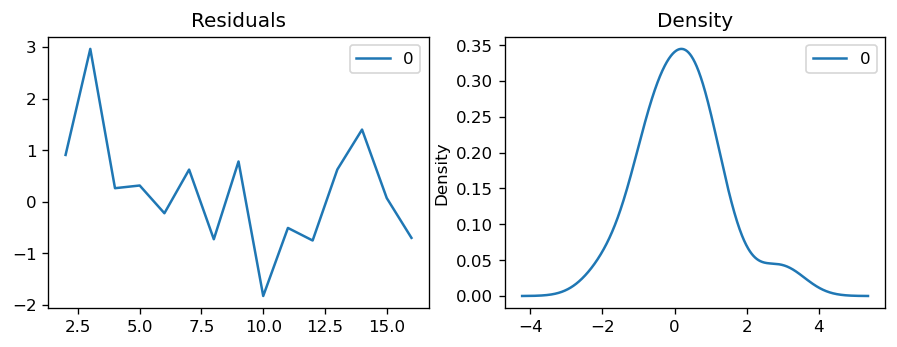

               0
count  15.000000
mean    0.213602
std     1.123574
min    -1.827897
25%    -0.604583
50%     0.262181
75%     0.702308
max     2.963708


In [222]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())

Residuals are showing the gaussian distribution. There mean is close to 0 ( 0.2)

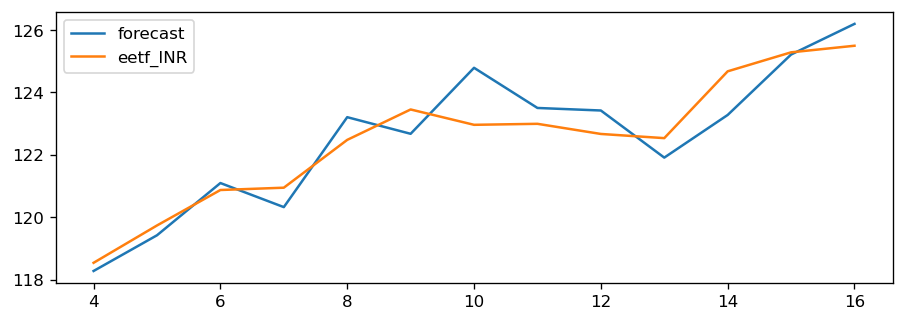

In [223]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [224]:
fc, se, conf = model_fit.forecast(17, alpha=0.05) 
fc_series = pd.Series(fc, index=x.index)
np.mean(np.abs(fc-x)/x)

0.12644335578438493

We are getting 12% MEAN ABSOLUTE PERCENTAGE ERROR which can be considered good!

NOW WE WILL REPEAT THE SAME THING FOR EquityETF for November

In [225]:
x = df[df["IfOct"]==0]["eetf_INR"]
result = adfuller(x.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.286824
p-value: 0.635179


In [226]:
## Adf Test
print(ndiffs(x, test='adf'))  

# KPSS test
print(ndiffs(x, test='kpss'))

# PP test:
print(ndiffs(x, test='pp')) 

2
0
1


In [227]:
autoarima_model = pmd.auto_arima(x, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=41.528, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=37.994, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=37.546, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=35.331, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=37.199, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=37.123, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=37.331, Time=0.03 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.527 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   18
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 -13.665
Date:                Wed, 06 Jan 2021   AIC                             35.331
Time:                        21:56:33   BIC                             38.421
Sample:                             0   HQIC                            35.489
                                 - 18                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0057      0.349     -2.881      0.004      -1.690      -0.322
ar.L2         -0.7873      0.389     -2.022      0.043      -1.550      -0.024
ar.L3         -0.5424      0.309     -1.757      0.079      -1.147       0.063
sigma2         0.2894      0.213      1.356      0.175      -0.129       0.708
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.90   Prob(JB):                         0.69
Heteroskedasticity (H):               0.83   Skew:                            -0.11
Prob(H) (two-sided):                  0.84   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIM(3,2,0) is coming out to be good fit.

In [228]:
model = ARIMA(x, order=(3,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.eetf_INR   No. Observations:                   16
Model:                 ARIMA(3, 2, 0)   Log Likelihood                 -13.665
Method:                       css-mle   S.D. of innovations              0.538
Date:                Wed, 06 Jan 2021   AIC                             37.331
Time:                        21:56:33   BIC                             41.194
Sample:                             2   HQIC                            37.529
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0003      0.044      0.006      0.995      -0.086       0.087
ar.L1.D2.eetf_INR    -1.0058      0.215     -4.683      0.000      -1.427      -0.585
ar.L2.D2.eetf_INR    -0.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

All the terms are significant. thus it is a good model.

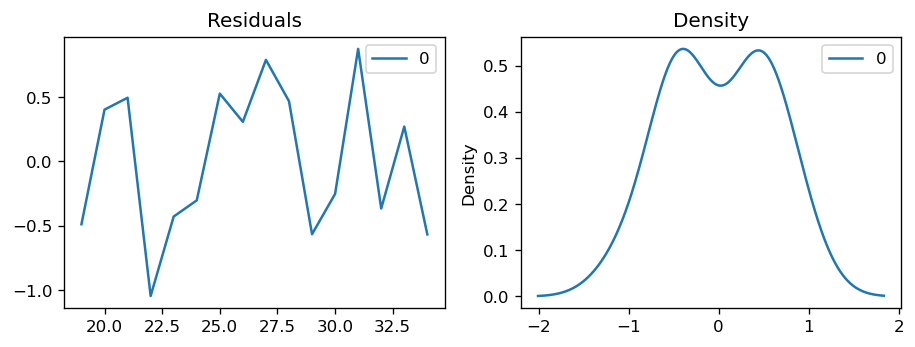

               0
count  16.000000
mean    0.007431
std     0.572049
min    -1.046151
25%    -0.443452
50%     0.009222
75%     0.475133
max     0.874932


In [229]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())

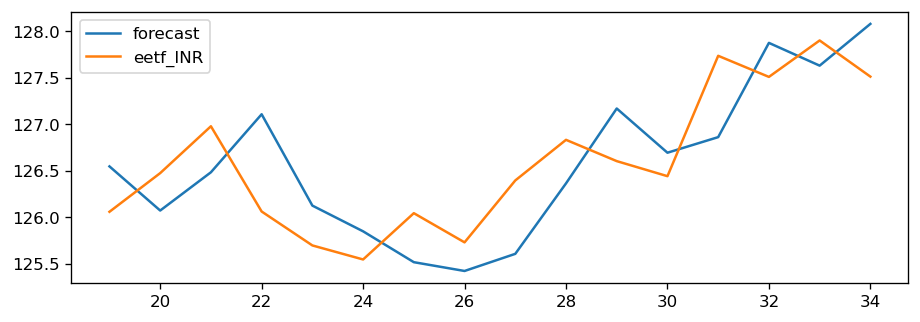

In [230]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [231]:
fc, se, conf = model_fit.forecast(18, alpha=0.05) 
fc_series = pd.Series(fc, index=x.index)
np.mean(np.abs(fc-x)/x)

0.022493378799172428

We are getting MEAN ABSOLUTE PERCENTAGE ERROR as 2% ; which is good!

REPEATING THE SAME THING FOR GoldETF OCTOBER

In [232]:
x = df[df["IfOct"]==1]["getf_$"]
result = adfuller(x.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.924780
p-value: 0.320495


In [233]:
autoarima_model = pmd.auto_arima(x, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-26.283, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24.943, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-26.281, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28.265, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.226 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   17
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  15.133
Date:                Wed, 06 Jan 2021   AIC                            -28.265
Time:                        21:56:34   BIC                            -27.493
Sample:                             0   HQIC                           -28.226
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0088      0.004      2.127      0.033       0.001       0.017
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.40   Prob(JB):                         0.70
Heteroskedasticity (H):               1.22   Skew:                            -0.31
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [234]:
model = ARIMA(x, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.getf_$   No. Observations:                   16
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  15.142
Method:                           css   S.D. of innovations              0.094
Date:                Wed, 06 Jan 2021   AIC                            -26.283
Time:                        21:56:34   BIC                            -24.738
Sample:                             1   HQIC                           -26.204
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.023      0.133      0.894      -0.043       0.049


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


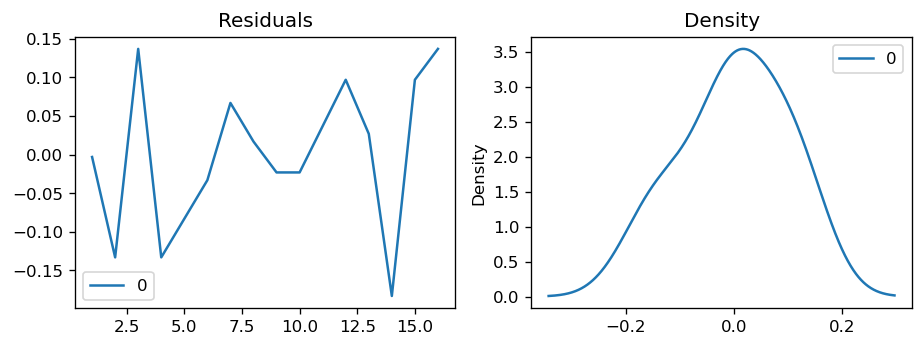

                  0
count  1.600000e+01
mean   7.480231e-10
std    9.700301e-02
min   -1.831250e-01
25%   -4.562500e-02
50%    6.875001e-03
75%    7.437500e-02
max    1.368750e-01


In [235]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())

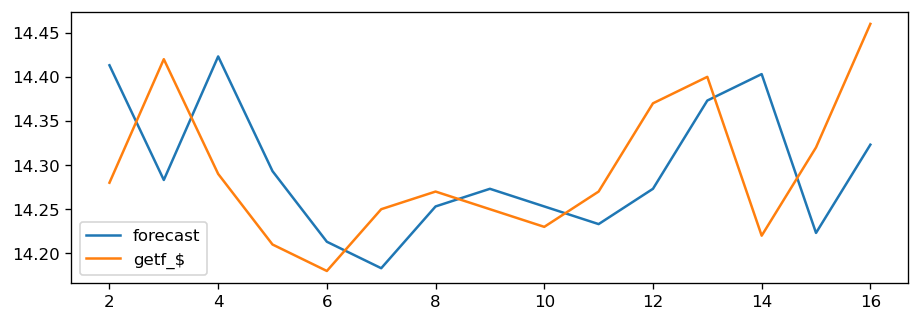

0.012607228886740427

In [236]:
model_fit.plot_predict(dynamic=False)
plt.show()
fc, se, conf = model_fit.forecast(17, alpha=0.05) 
fc_series = pd.Series(fc, index=x.index)
np.mean(np.abs(fc-x)/x)

Getting 2% MAPE for the given ARIMA(1,2,0) model

In [237]:
x = df[df["IfOct"]==0]["getf_$"]
result = adfuller(x.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
autoarima_model = pmd.auto_arima(x, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
autoarima_model.summary()

ADF Statistic: -0.300522
p-value: 0.925430
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-23.892, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-13.391, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-24.420, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-23.090, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-23.529, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-21.962, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-22.811, Time=0.04 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.252 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   18
Model:               SARIMAX(1, 2, 0)   Log Likelihood                  14.210
Date:                Wed, 06 Jan 2021   AIC                            -24.420
Time:                        21:56:34   BIC                            -22.875
Sample:                             0   HQIC                           -24.341
                                 - 18                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7806      0.168     -4.647      0.000      -1.110      -0.451
sigma2         0.0093      0.003      2.852      0.004       0.003       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 2.01
Prob(Q):                              0.38   Prob(JB):                         0.37
Heteroskedasticity (H):               0.11   Skew:                             0.86
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                             ARIMA Model Results                              
Dep. Variable:              D2.getf_$   No. Observations:                   16
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  14.405
Method:                       css-mle   S.D. of innovations              0.095
Date:                Wed, 06 Jan 2021   AIC                            -22.811
Time:                        21:56:35   BIC                            -20.493
Sample:                             2   HQIC                           -22.692
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0087      0.014      0.631      0.528      -0.018       0.036
ar.L1.D2.getf_$    -0.7887      0.153     -5.167      0.000      -1.088      -0.490
                                

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

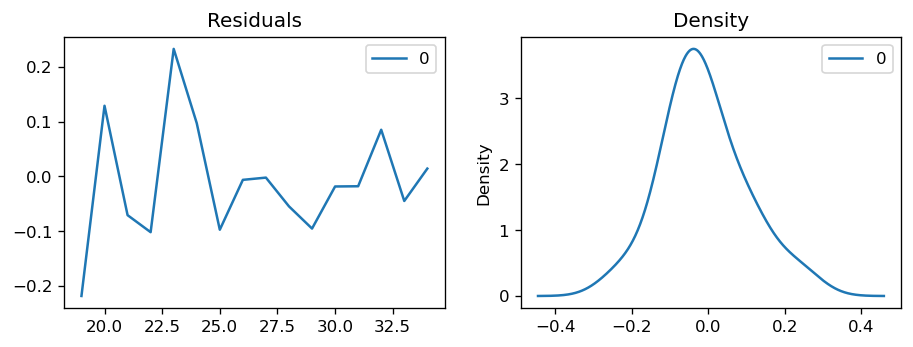

               0
count  16.000000
mean   -0.010778
std     0.107548
min    -0.218656
25%    -0.077110
50%    -0.018370
75%     0.031844
max     0.232822


In [238]:
model = ARIMA(x, order=(1,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
print(residuals.describe())

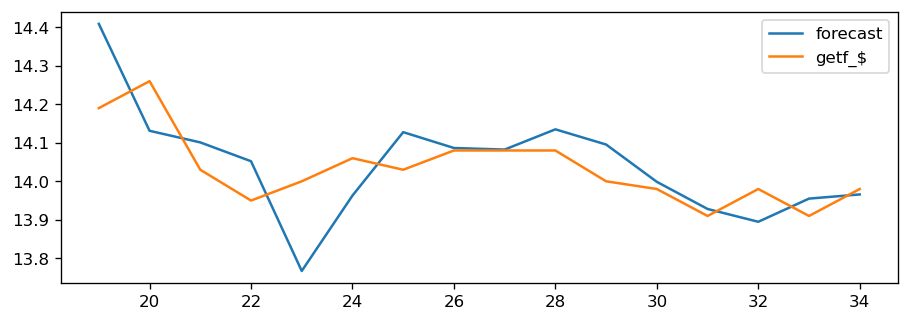

0.04818870701681833

In [239]:
model_fit.plot_predict(dynamic=False)
plt.show()
fc, se, conf = model_fit.forecast(18, alpha=0.05) 
fc_series = pd.Series(fc, index=x.index)
np.mean(np.abs(fc-x)/x)

### QUESTION-7 MODELLING VOLATILITY

### QUESTION-8 CORRELATION

In [247]:
o=df[df["IfOct"]==1]
n=df[df["IfOct"]==0]
print("OCTOBER RETURNS CORRELATION IS: ",o["getf_Returns"].corr(o["eetf_Returns"]))
print("NOVEMBER RETURNS CORRELATION IS: ",n["getf_Returns"].corr(n["eetf_Returns"]))

OCTOBER RETURNS CORRELATION IS:  0.013591292968313486
NOVEMBER RETURNS CORRELATION IS:  -0.11560176948269557
